In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# read data set
ransomware_data = pd.read_csv("dataset_ransomware.csv", sep=',', parse_dates=True, header=8, encoding = "ISO-8859-1")
ransomware_data.head(20)


,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
0,2018-08-12 00:46:13,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,2018-08-10 05:43:15,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,2018-08-10 05:43:15,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,2018-08-09 16:50:50,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,2018-08-09 07:16:22,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU
5,2018-08-08 21:07:16,C2,Locky,217.12.199.244,http://217.12.199.244/apache_handler.php,offline,NaN,217.12.199.244,15626,UA
6,2018-08-03 20:44:38,C2,Locky,www.1axb.com,http://www.1axb.com/main.php,online,"GoDaddy.com, LLC",109.248.222.50,57494,RU
7,2018-08-02 19:02:22,C2,Locky,176.31.127.168,http://176.31.127.168/checkupdate,offline,NaN,176.31.127.168,16276,FR
8,2018-08-02 12:40:27,C2,Locky,5.39.76.12,http://5.39.76.12/main.php,offline,NaN,5.39.76.12,16276,FR
9,2018-08-02 12:40:27,C2,Locky,195.123.209.122,http://195.123.209.122/main.php,online,NaN,195.123.209.122,50979,LV


In [2]:
top20ASN = ransomware_data["ASN(s)"].value_counts().rename_axis('ASN(s)').reset_index(name='#infections')[:20]
top20Df = pd.DataFrame(top20ASN)
# Remove the unused pipe as it is the same value behind.
top20Df['ASN(s)'] = top20Df['ASN(s)'].str.split('|').str[0]
# Convert ASN column to integers
top20Df['ASN(s)'] = top20Df['ASN(s)'].apply(int)
# top20Df.columns = ['ASN(s)', '#infections']
top20Df

,ASN(s),#infections
0,26496,485
1,6939,293
2,16276,240
3,40034,233
4,46606,156
5,8612,155
6,8426,152
7,24940,141
8,0,139
9,40263,138


In [3]:
#Read ASN
# Dataset is created by using https://mxtoolbox.com/SuperTool.aspx
ASN_data = pd.read_csv("asn.csv", sep=';', parse_dates=True, header=0, encoding = "ISO-8859-1")
ASN_data

,ASN(s),HostProvider,#Ips
0,26496,"GoDaddy.com, LLC",1852672
1,6939,"Hurricane Electric, Inc.",592896
2,16276,OVH SAS,2734080
3,40034,Confluence Networks Inc,11008
4,46606,Unified Layer,649472
5,8612,Tiscali Italia S.P.A.,1955712
6,8426,ClaraNET LTD,1084416
7,24940,Hetzner Online AG,1241600
8,0,Unknown,0
9,40263,FC2 INC,2048


In [4]:
top20merged = pd.merge(top20Df, ASN_data, on='ASN(s)', how='left')
top20merged

,ASN(s),#infections,HostProvider,#Ips
0,26496,485,"GoDaddy.com, LLC",1852672
1,6939,293,"Hurricane Electric, Inc.",592896
2,16276,240,OVH SAS,2734080
3,40034,233,Confluence Networks Inc,11008
4,46606,156,Unified Layer,649472
5,8612,155,Tiscali Italia S.P.A.,1955712
6,8426,152,ClaraNET LTD,1084416
7,24940,141,Hetzner Online AG,1241600
8,0,139,Unknown,0
9,40263,138,FC2 INC,2048


In [5]:
percentage_infected = top20merged['#infections']/top20merged['#Ips']
# percentage_infected = percentage_infected.sort_values(ascending=False)
top20merged['Normalised'] = percentage_infected
top20merged = top20merged.sort_values(by=['Normalised'], ascending=False)
top20merged

,ASN(s),#infections,HostProvider,#Ips,Normalised
8,0,139,Unknown,0,inf
9,40263,138,FC2 INC,2048,0.067383
3,40034,233,Confluence Networks Inc,11008,0.021166
13,20013,110,CyrusOne LLC,22144,0.004967
15,22612,98,"Namecheap, Inc.",37888,0.002587
10,32748,131,Steadfast Networks,164096,0.000798
1,6939,293,"Hurricane Electric, Inc.",592896,0.000494
12,60781,115,LeaseWeb B.V.,384512,0.000299
16,31034,85,Aruba S.p.A.,299008,0.000284
0,26496,485,"GoDaddy.com, LLC",1852672,0.000262


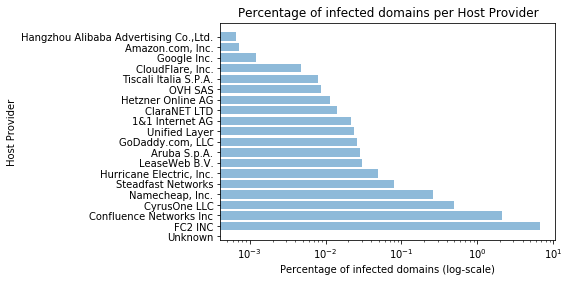

In [6]:
labels = top20merged['HostProvider']
plt.barh(labels, top20merged['Normalised'] * 100, align='center', alpha=0.5, log=True)
plt.ylabel('Host Provider')
plt.xlabel("Percentage of infected domains (log-scale)")
plt.title('Percentage of infected domains per Host Provider') 
plt.savefig('barchartHostVSInfections.png')

In [7]:
asn_country = ransomware_data[["ASN(s)","Country"]]
asn_country = asn_country.drop_duplicates(subset=['ASN(s)', 'Country'], keep="first")
# asn_country.loc[asn_country["ASN(s)"] == "26496"]

In [8]:
# Get ASN and country couples and count total infections
asn_country_dataset = ransomware_data[["ASN(s)", "Country"]]
asn_country_dataset = asn_country_dataset.groupby(["ASN(s)", "Country"]).size().reset_index(name="#infections")

top20ASN["ASN(s)"] = top20ASN["ASN(s)"].apply(str)
ASN_data["ASN(s)"] = ASN_data["ASN(s)"].apply(str)

# Get only the host providers of the top 20 list
asn_country_dataset = asn_country_dataset.loc[asn_country_dataset["ASN(s)"].isin(top20ASN["ASN(s)"])]
asn_country_dataset

# Map ASN to Host Provider names
hostprovider_country = pd.merge(asn_country_dataset, ASN_data[["ASN(s)", "HostProvider"]], on='ASN(s)', how='left')
hostprovider_country.sort_values(by=['HostProvider'], ascending=False)




,ASN(s),Country,#infections,HostProvider
29,46606,US,156,Unified Layer
41,8612,IT,155,Tiscali Italia S.P.A.
23,32748,US,131,Steadfast Networks
9,16276,FR,165,OVH SAS
14,16276,US,13,OVH SAS
13,16276,PL,13,OVH SAS
11,16276,IT,1,OVH SAS
10,16276,GB,12,OVH SAS
12,16276,NL,3,OVH SAS
8,16276,FI,1,OVH SAS


In [9]:
# Import rule of law csv
rol_data = pd.read_csv("data.csv", sep=',', parse_dates=True, header=0, encoding = "ISO-8859-1")
corr_data = rol_data[2:]
corr_data

,CountryCode,#infections,RoL,E-Participation,Extent of staff training,Capacity of innovation,% of internet users,Secure internet servers
2,AU,1,0.81,0.94,4.5,4.6,0.830,1253.3
3,BR,1,0.54,0.71,4.3,4.1,0.516,57.4
4,CA,20,0.81,0.82,4.7,4.6,0.858,1035.3
5,CN,79,0.50,0.65,4.4,4.8,0.800,3.9
6,DE,219,0.83,0.71,5.0,5.6,0.840,1070.9
7,ES,25,0.70,0.78,3.7,3.8,0.716,269.0
8,FI,1,0.87,0.71,5.3,5.6,0.915,1546.9
9,FR,165,0.74,0.96,4.5,4.8,0.819,486.1
10,GB,102,0.81,0.96,4.7,5.3,0.898,1193.5
11,IT,241,0.65,0.78,3.2,4.3,0.585,203.2


In [10]:
# Merge with the rule of law csv on countriecodes
rol_dataset = pd.merge(hostprovider_country, rol_data[["RoL", "CountryCode"]], left_on="Country", right_on="CountryCode", how='left')

# Remove a randomly appearing duplicate
rol_dataset = rol_dataset.drop(rol_dataset.index[4])

# Remove Country column
rol_dataset = rol_dataset.drop(columns="Country")

# Remove ASN column
rol_dataset = rol_dataset.drop(columns="ASN(s)")

rol_dataset = rol_dataset[["HostProvider", "#infections", "CountryCode", "RoL"]]

rol_dataset

,HostProvider,#infections,CountryCode,RoL
0,"CloudFlare, Inc.",6,US,0.73
1,"Amazon.com, Inc.",17,US,0.73
2,Google Inc.,79,US,0.73
3,OVH SAS,2,AR,0.58
5,OVH SAS,1,AU,0.81
6,OVH SAS,1,BR,0.54
7,OVH SAS,20,CA,0.81
8,OVH SAS,8,ES,0.70
9,OVH SAS,1,FI,0.87
10,OVH SAS,165,FR,0.74


In [11]:
# from pandas.plotting import table

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, rol_dataset)  # where df is your data frame

# plt.savefig('HP_RoL.png')

with open('HP_RoL.tex','w') as tf:
    tf.write(rol_dataset.to_latex())

In [12]:
country_infection_dataset = rol_dataset[["CountryCode", "#infections"]].groupby(["CountryCode"]).sum()
country_infection_dataset = pd.merge(country_infection_dataset, rol_data[["RoL", "CountryCode"]], on="CountryCode", how='left')
country_infection_dataset

,CountryCode,#infections,RoL
0,AR,2,0.58
1,AU,1,0.81
2,AU,1,0.81
3,BR,1,0.54
4,CA,20,0.81
5,CN,79,0.50
6,DE,219,0.83
7,ES,25,0.70
8,FI,1,0.87
9,FR,165,0.74


In [13]:
with open('country_infection.tex','w') as tf:
    tf.write(country_infection_dataset.to_latex())

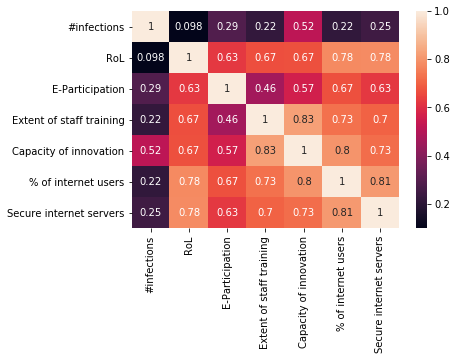

In [14]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

corr_matrix = corr_data.corr()
p_values = calculate_pvalues(corr_data)
p_values.to_csv("p_vals.csv")

import seaborn as sns
plt = sns.heatmap(corr_matrix, annot=True)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('heatmap_corr.pdf') as pdf:
    pdf.savefig()